<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

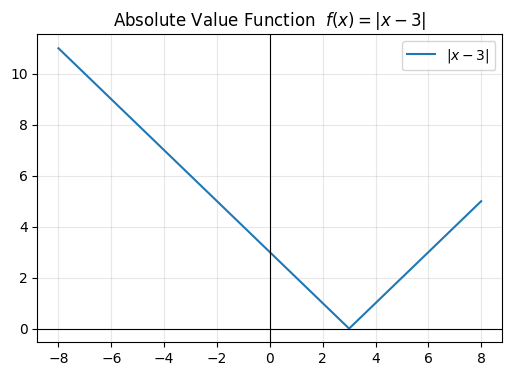

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [1]:
# ============================================================
# 📘 Chapter 1 — Real Numbers
# ============================================================
# Explore algebraic and numerical properties of real numbers using SymPy, NumPy, and Matplotlib.

from sympy import symbols, Rational, sqrt, Abs, simplify, solve, Eq, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

x, y = symbols('x y', real=True)

# --- Algebraic simplification ---
expr = sqrt(2) * sqrt(8)
display(Math(r"\sqrt{2}\,\sqrt{8} = " + latex(simplify(expr))))

# --- Rational arithmetic ---
r1, r2 = Rational(3, 4), Rational(5, 6)
display(Math(r"\frac{3}{4} + \frac{5}{6} = " + latex(r1 + r2)))

# --- Absolute value equation ---
solutions = solve(Eq(Abs(x - 3), 5), x)
display(Math(r"|x - 3| = 5 \;\Rightarrow\; x = " + latex(solutions)))

# --- Plot absolute value function ---
X = np.linspace(-8, 8, 400)
Y = np.abs(X - 3)
plt.figure(figsize=(6,4))
plt.plot(X, Y, label=r"$|x-3|$")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, alpha=0.3)
plt.title("Absolute Value Function  $f(x)=|x-3|$")
plt.legend()
plt.show()

# --- Rational vs. irrational examples ---
display(Math(r"Rational: \frac{1}{3} = " + latex(Rational(1,3))))
display(Math(r"Irrational: \sqrt{2} \approx " + latex(sqrt(2).evalf(6))))

# --- Numerical approximation ---
approx = np.sqrt(2)
display(Math(r"\sqrt{2} \approx " + str(round(approx, 6))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

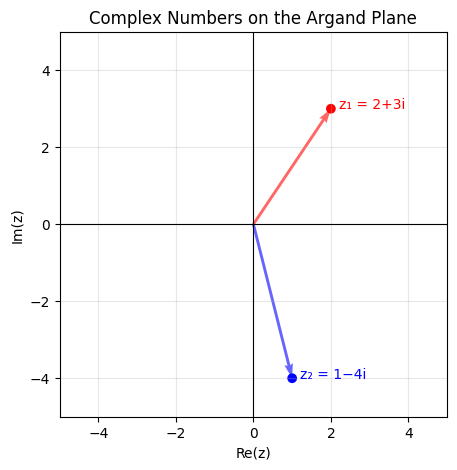

In [3]:
# ============================================================
# 📘 Chapter 2 — Complex Numbers
# ============================================================
# Explore basic operations with complex numbers, their modulus,
# conjugate, argument, and polar representation with visualization.

from sympy import symbols, I, Abs, arg, conjugate, simplify, re, im, latex
from IPython.display import display, Math
import matplotlib.pyplot as plt
import numpy as np

# Define two complex numbers
z1 = 2 + 3*I
z2 = 1 - 4*I

# --- Algebraic properties ---
display(Math(r"z_1 = " + latex(z1)))
display(Math(r"\overline{z_1} = " + latex(conjugate(z1))))
display(Math(r"|z_1| = " + latex(Abs(z1))))
display(Math(r"\operatorname{Re}(z_1) = " + latex(re(z1)) + r", \; \operatorname{Im}(z_1) = " + latex(im(z1))))

# --- Polar representation ---
r = Abs(z1)
theta = arg(z1)
display(Math(r"z_1 = r(\cos\theta + i\sin\theta), \; r=" + latex(r) + r", \; \theta=" + latex(theta.evalf(3))))

# --- Arithmetic operations ---
display(Math(r"z_1 + z_2 = " + latex(simplify(z1 + z2))))
display(Math(r"z_1 \times z_2 = " + latex(simplify(z1 * z2))))
display(Math(r"\frac{z_1}{z_2} = " + latex(simplify(z1 / z2))))

# --- Visualization on the Argand plane ---
plt.figure(figsize=(5,5))
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, alpha=0.3)

# Convert symbolic to numeric values
x1, y1 = float(re(z1)), float(im(z1))
x2, y2 = float(re(z2)), float(im(z2))

# Plot points and arrows
plt.scatter([x1, x2], [y1, y2], color=['red','blue'])
plt.quiver(0, 0, x1, y1, angles='xy', scale_units='xy', scale=1, color='red', alpha=0.6)
plt.quiver(0, 0, x2, y2, angles='xy', scale_units='xy', scale=1, color='blue', alpha=0.6)
plt.text(x1+0.2, y1, "z₁ = 2+3i", color='red')
plt.text(x2+0.2, y2, "z₂ = 1−4i", color='blue')

plt.xlim(-5,5)
plt.ylim(-5,5)
plt.title("Complex Numbers on the Argand Plane")
plt.xlabel("Re(z)")
plt.ylabel("Im(z)")
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

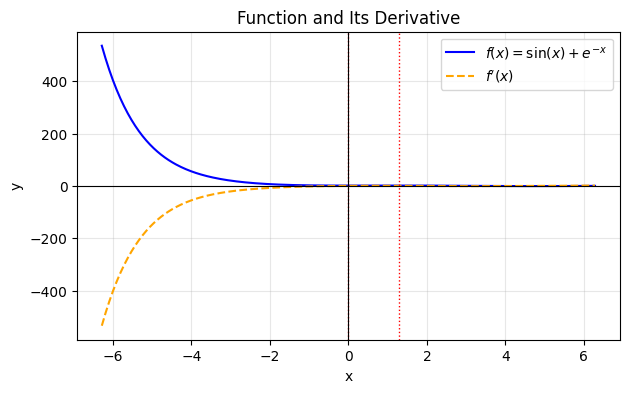

<IPython.core.display.Math object>

In [5]:
# ============================================================
# 📘 Chapter 3 — Functions
# ============================================================
# Define and analyze functions symbolically (SymPy)
# and visualize them numerically (NumPy + Matplotlib).

from sympy import symbols, sin, cos, exp, diff, nsolve, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and symbolic function
x = symbols('x', real=True)
f = sin(x) + exp(-x)

# --- Symbolic representation ---
display(Math(r"f(x) = \sin(x) + e^{-x}"))

# --- Evaluate function at specific points ---
val0 = f.subs(x, 0)
valpi = f.subs(x, np.pi)
display(Math(r"f(0) = " + latex(val0)))
display(Math(r"f(\pi) = " + latex(valpi)))

# --- Derivative and numerical critical points ---
fprime = diff(f, x)
display(Math(r"f'(x) = " + latex(fprime)))

# SymPy cannot solve analytically cos(x) - exp(-x) = 0, so use nsolve near guesses
guesses = [-3, -1, 1, 3]  # initial guesses for roots
critical_points = []
for g in guesses:
    try:
        root = nsolve(fprime, g)
        val = float(root)
        if all(abs(val - cp) > 1e-3 for cp in critical_points):  # avoid duplicates
            critical_points.append(val)
    except:
        pass

display(Math(r"\text{Approximate critical points: } x = " + latex([round(cp,3) for cp in critical_points])))

# --- Plot function and derivative ---
X = np.linspace(-2*np.pi, 2*np.pi, 400)
Y = np.sin(X) + np.exp(-X)
Yprime = np.cos(X) - np.exp(-X)

plt.figure(figsize=(7,4))
plt.plot(X, Y, label=r"$f(x)=\sin(x)+e^{-x}$", color='blue')
plt.plot(X, Yprime, '--', label=r"$f'(x)$", color='orange')
for cp in critical_points:
    plt.axvline(cp, color='red', ls=':', lw=1)
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Function and Its Derivative")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# --- Domain and range discussion ---
display(Math(r"\text{Domain: } \mathbb{R}, \quad \text{Range: approximately } (-1,\,\infty)"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

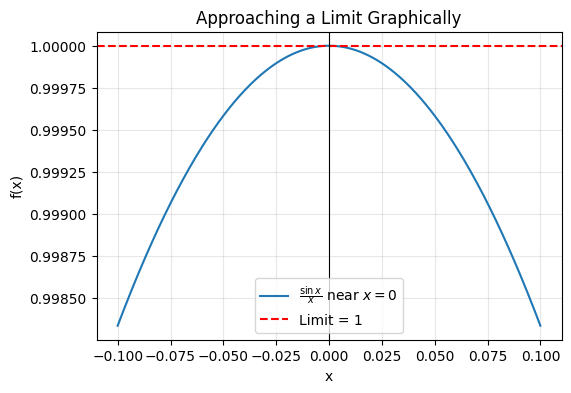

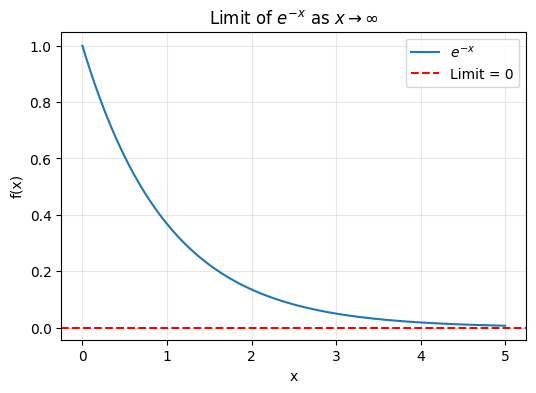

In [7]:
# ============================================================
# 📘 Chapter 4 — Limit of a Function
# ============================================================
# Explore symbolic and graphical computation of limits using SymPy and NumPy.

from sympy import symbols, sin, cos, exp, limit, log, oo, Piecewise, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and functions
x = symbols('x', real=True)
f = (sin(x)) / x
g = (1 - cos(x)) / x**2

# --- Symbolic limits ---
display(Math(r"\lim_{x \to 0} \frac{\sin x}{x} = " + latex(limit(f, x, 0))))
display(Math(r"\lim_{x \to 0} \frac{1 - \cos x}{x^2} = " + latex(limit(g, x, 0))))
display(Math(r"\lim_{x \to \infty} e^{-x} = " + latex(limit(exp(-x), x, oo))))
display(Math(r"\lim_{x \to 0^+} \ln x = " + latex(limit(log(x), x, 0, dir='+'))))

# --- Piecewise limit example ---
h = Piecewise((x**2, x < 0), (2*x, x >= 0))
left_limit = limit(h, x, 0, dir='-')
right_limit = limit(h, x, 0, dir='+')
display(Math(r"\text{For } h(x)=\begin{cases}x^2, & x<0\\2x, & x\ge0\end{cases}"))
display(Math(r"\lim_{x\to0^-} h(x) = " + latex(left_limit)))
display(Math(r"\lim_{x\to0^+} h(x) = " + latex(right_limit)))

# --- Graphical demonstration of limit ---
X1 = np.linspace(-0.1, 0.1, 400)
Y1 = np.sin(X1) / X1
Y1[np.isnan(Y1)] = 1  # handle x=0 case

plt.figure(figsize=(6,4))
plt.plot(X1, Y1, label=r"$\frac{\sin x}{x}$ near $x=0$")
plt.axhline(1, color='red', ls='--', label="Limit = 1")
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, alpha=0.3)
plt.title("Approaching a Limit Graphically")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()

# --- Limit visualization for exponential decay ---
X2 = np.linspace(0, 5, 400)
Y2 = np.exp(-X2)

plt.figure(figsize=(6,4))
plt.plot(X2, Y2, label=r"$e^{-x}$")
plt.axhline(0, color='red', ls='--', label="Limit = 0")
plt.title(r"Limit of $e^{-x}$ as $x \to \infty$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

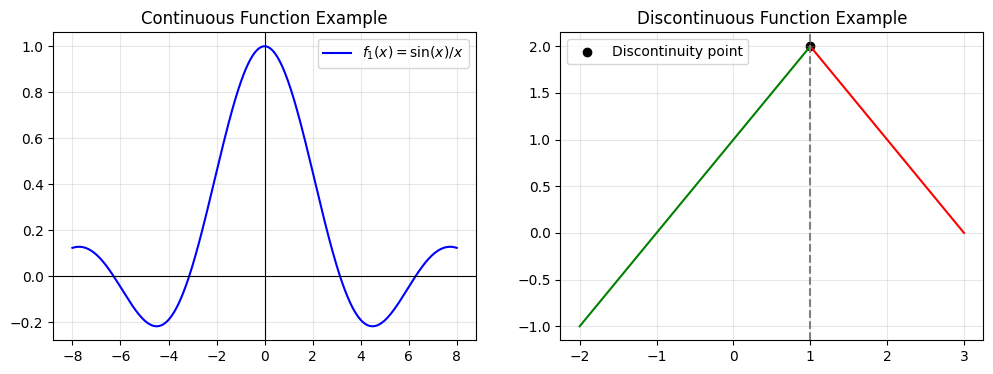

In [8]:
# ============================================================
# 📘 Chapter 5 — Continuity
# ============================================================
# Symbolic and graphical study of continuity using SymPy and Matplotlib.

from sympy import symbols, Piecewise, sin, limit, simplify, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable
x = symbols('x', real=True)

# --- Define two example functions ---
# Continuous function
f1 = sin(x)/x
# Discontinuous function (jump discontinuity)
f2 = Piecewise((x + 1, x < 1), (3 - x, x >= 1))

# --- Check continuity of f1 at x=0 ---
L_left = limit(f1, x, 0, dir='-')
L_right = limit(f1, x, 0, dir='+')
f1_at_0 = simplify(f1.subs(x, 0)) if f1.subs(x, 0).is_real else None

display(Math(r"f_1(x) = \frac{\sin x}{x}"))
display(Math(r"\lim_{x\to0^-} f_1(x) = " + latex(L_left)))
display(Math(r"\lim_{x\to0^+} f_1(x) = " + latex(L_right)))
display(Math(r"f_1(0) = \text{undefined, but continuous extension } f_1(0)=1"))

# --- Check continuity of f2 at x=1 ---
L_left2 = limit(f2, x, 1, dir='-')
L_right2 = limit(f2, x, 1, dir='+')
f2_at_1 = f2.subs(x, 1)

display(Math(r"f_2(x) = \begin{cases}x+1,&x<1\\3-x,&x\ge1\end{cases}"))
display(Math(r"\lim_{x\to1^-} f_2(x) = " + latex(L_left2)))
display(Math(r"\lim_{x\to1^+} f_2(x) = " + latex(L_right2)))
display(Math(r"f_2(1) = " + latex(f2_at_1)))
display(Math(r"\text{Since } \lim_{x\to1^-} f_2(x) \ne \lim_{x\to1^+} f_2(x), \text{ f₂ is discontinuous at } x=1."))

# --- Plot both functions to visualize continuity ---
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Continuous example: sin(x)/x
X = np.linspace(-8, 8, 400)
Y = np.sin(X) / X
Y[np.isnan(Y)] = 1  # handle x=0
axs[0].plot(X, Y, color='blue', label=r"$f_1(x)=\sin(x)/x$")
axs[0].axvline(0, color='black', lw=0.8)
axs[0].axhline(0, color='black', lw=0.8)
axs[0].grid(True, alpha=0.3)
axs[0].set_title("Continuous Function Example")
axs[0].legend()

# Discontinuous example
X2_left = np.linspace(-2, 1, 100)
X2_right = np.linspace(1, 3, 100)
Y2_left = X2_left + 1
Y2_right = 3 - X2_right
axs[1].plot(X2_left, Y2_left, color='green')
axs[1].plot(X2_right, Y2_right, color='red')
axs[1].scatter([1], [f2_at_1], color='black', label='Discontinuity point')
axs[1].axvline(1, color='gray', ls='--')
axs[1].grid(True, alpha=0.3)
axs[1].set_title("Discontinuous Function Example")
axs[1].legend()

plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

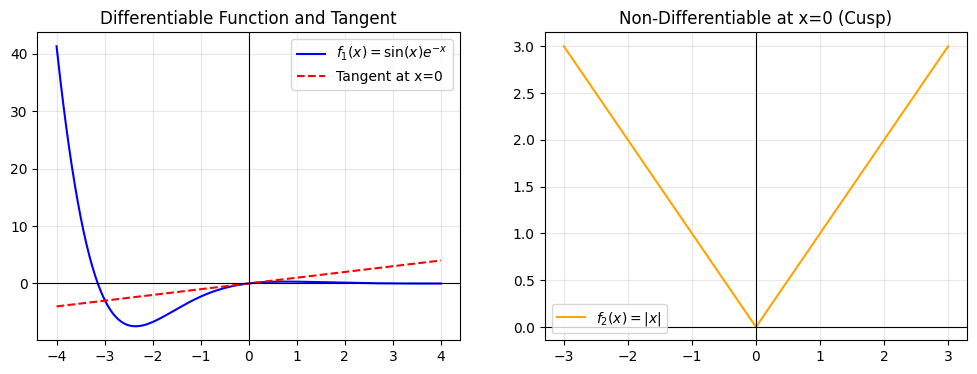

In [9]:
# ============================================================
# 📘 Chapter 6 — Differentiability
# ============================================================
# Symbolic differentiation, checking differentiability, and
# visualizing tangents with SymPy and Matplotlib.

from sympy import symbols, diff, Abs, Piecewise, sin, cos, exp, limit, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable
x = symbols('x', real=True)

# --- Define two functions ---
# Smooth (differentiable everywhere)
f1 = sin(x) * exp(-x)
# Non-differentiable at x=0 (cusp)
f2 = Abs(x)

# --- Symbolic derivatives ---
f1_prime = diff(f1, x)
f2_prime_left = limit(diff(f2, x), x, 0, dir='-')
f2_prime_right = limit(diff(f2, x), x, 0, dir='+')

display(Math(r"f_1(x) = \sin(x)e^{-x}, \quad f_1'(x) = " + latex(f1_prime)))
display(Math(r"f_2(x) = |x|"))
display(Math(r"\lim_{x\to0^-} f_2'(x) = " + latex(f2_prime_left)))
display(Math(r"\lim_{x\to0^+} f_2'(x) = " + latex(f2_prime_right)))
display(Math(r"\text{Since left and right derivatives differ, } f_2 \text{ is not differentiable at } x=0."))

# --- Numerical tangent line at x0=0 for f1 ---
x0 = 0
f1_val = float(f1.subs(x, x0))
f1_slope = float(f1_prime.subs(x, x0))

# Tangent line function
def tangent_line(x_val):
    return f1_val + f1_slope*(x_val - x0)

# --- Plot both functions ---
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Left: differentiable f1
X = np.linspace(-4, 4, 400)
Y = np.sin(X)*np.exp(-X)
axs[0].plot(X, Y, color='blue', label=r"$f_1(x)=\sin(x)e^{-x}$")
axs[0].plot(X, tangent_line(X), 'r--', label="Tangent at x=0")
axs[0].axhline(0, color='black', lw=0.8)
axs[0].axvline(0, color='black', lw=0.8)
axs[0].grid(True, alpha=0.3)
axs[0].legend()
axs[0].set_title("Differentiable Function and Tangent")

# Right: non-differentiable f2
X2 = np.linspace(-3, 3, 400)
Y2 = np.abs(X2)
axs[1].plot(X2, Y2, color='orange', label=r"$f_2(x)=|x|$")
axs[1].axhline(0, color='black', lw=0.8)
axs[1].axvline(0, color='black', lw=0.8)
axs[1].grid(True, alpha=0.3)
axs[1].legend()
axs[1].set_title("Non-Differentiable at x=0 (Cusp)")

plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

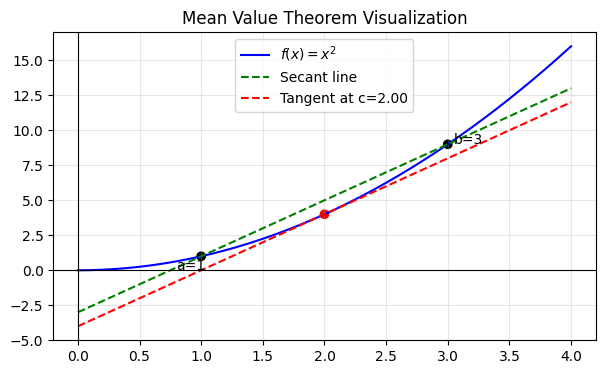

In [10]:
# ============================================================
# 📘 Chapter 7 — Mean Value Theorems
# ============================================================
# Symbolic verification of Rolle's and Mean Value Theorems (MVT),
# and graphical visualization of secant and tangent lines.

from sympy import symbols, diff, solve, sin, cos, Eq, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and function
x = symbols('x', real=True)
f = sin(x)

# --- Rolle's Theorem example ---
# On [0, π], f(0) = f(π) = 0 ⇒ there exists c where f'(c)=0
fprime = diff(f, x)
critical_points = solve(Eq(fprime, 0), x)

display(Math(r"f(x)=\sin x, \quad f'(x)=\cos x"))
display(Math(r"f(0)=f(\pi)=0, \text{ so Rolle's Theorem applies.}"))
display(Math(r"f'(c)=0 \;\Rightarrow\; \cos c=0 \Rightarrow c=\frac{\pi}{2}"))
display(Math(r"\text{At } c=\frac{\pi}{2}, \text{ the tangent is horizontal.}"))

# --- Mean Value Theorem example ---
# For f(x)=x^2 on [1,3], there exists c with f'(c)= (f(3)-f(1))/(3-1)
f2 = x**2
f2prime = diff(f2, x)
a, b = 1, 3
slope_secant = (f2.subs(x, b) - f2.subs(x, a)) / (b - a)
c_val = solve(Eq(f2prime, slope_secant))[0]

display(Math(r"f(x)=x^2, \quad f'(x)=2x"))
display(Math(r"\frac{f(3)-f(1)}{3-1} = " + latex(slope_secant)))
display(Math(r"2c = " + latex(slope_secant) + r" \;\Rightarrow\; c=" + latex(c_val)))
display(Math(r"\text{MVT point: } c=" + latex(c_val)))

# --- Plot for Mean Value Theorem example ---
X = np.linspace(0, 4, 200)
Y = X**2

# secant line through (a,f(a)) and (b,f(b))
secant_line = slope_secant * (X - a) + f2.subs(x, a)
# tangent line at x=c
tangent_line = f2prime.subs(x, c_val)*(X - c_val) + f2.subs(x, c_val)

plt.figure(figsize=(7,4))
plt.plot(X, Y, label=r"$f(x)=x^2$", color='blue')
plt.plot(X, secant_line, 'g--', label="Secant line")
plt.plot(X, tangent_line, 'r--', label=f"Tangent at c={float(c_val):.2f}")
plt.scatter([a, b, float(c_val)], [f2.subs(x,a), f2.subs(x,b), f2.subs(x,c_val)],
            color=['black','black','red'])
plt.text(a-0.2, f2.subs(x,a)-1, "a=1")
plt.text(b+0.05, f2.subs(x,b), "b=3")
plt.title("Mean Value Theorem Visualization")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

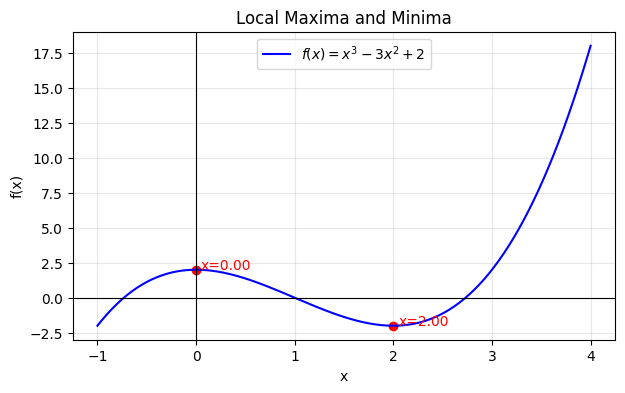

In [11]:
# ============================================================
# 📘 Chapter 8 — Local Extrema
# ============================================================
# Symbolic determination of local maxima and minima
# using the first and second derivative tests, plus visualization.

from sympy import symbols, diff, sin, cos, exp, solve, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and function
x = symbols('x', real=True)
f = x**3 - 3*x**2 + 2     # cubic with turning points

# --- First derivative (critical points) ---
fprime = diff(f, x)
critical_points = solve(fprime, x)
display(Math(r"f(x) = " + latex(f)))
display(Math(r"f'(x) = " + latex(fprime)))
display(Math(r"\text{Critical points: } x = " + latex(critical_points)))

# --- Second derivative (concavity test) ---
fdouble = diff(fprime, x)
display(Math(r"f''(x) = " + latex(fdouble)))

# Evaluate f'' at each critical point
for c in critical_points:
    val = fdouble.subs(x, c)
    if val > 0:
        nature = "local minimum"
    elif val < 0:
        nature = "local maximum"
    else:
        nature = "inflection"
    display(Math(r"x=" + latex(c) + r": f''(x)=" + latex(val) + r" \Rightarrow " + nature))

# --- Prepare numerical plot ---
X = np.linspace(-1, 4, 400)
Y = X**3 - 3*X**2 + 2

plt.figure(figsize=(7,4))
plt.plot(X, Y, color='blue', label=r"$f(x)=x^3-3x^2+2$")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)

# Mark critical points
for c in critical_points:
    y_val = f.subs(x, c)
    plt.scatter([float(c)], [float(y_val)], color='red')
    plt.text(float(c)+0.05, float(y_val),
             f"x={float(c):.2f}", color='red')

plt.title("Local Maxima and Minima")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

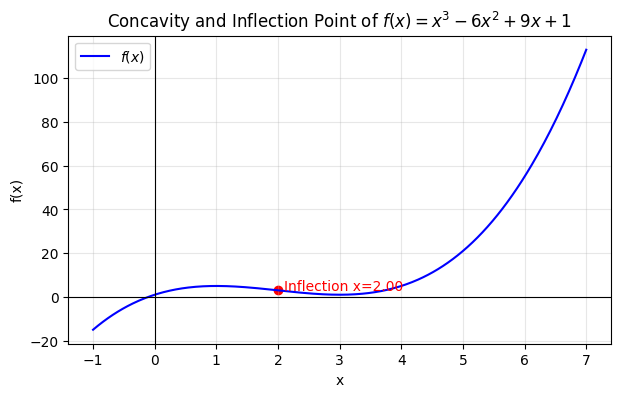

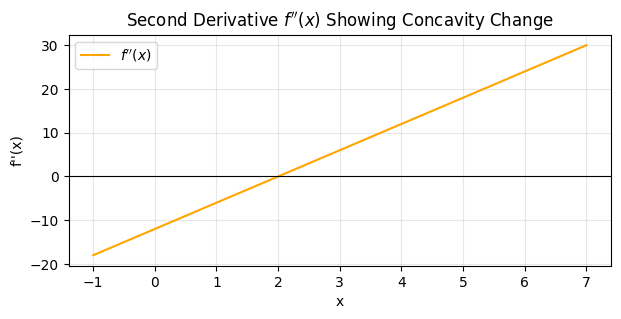

In [12]:
# ============================================================
# 📘 Chapter 9 — Concavity and Inflection Points
# ============================================================
# Analyze concavity and inflection points using the second derivative.
# Visualize changes in concavity and the points of inflection.

from sympy import symbols, diff, solve, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and function
x = symbols('x', real=True)
f = x**3 - 6*x**2 + 9*x + 1

# --- Derivatives ---
f_prime = diff(f, x)
f_double = diff(f_prime, x)

display(Math(r"f(x) = " + latex(f)))
display(Math(r"f'(x) = " + latex(f_prime)))
display(Math(r"f''(x) = " + latex(f_double)))

# --- Solve for possible inflection points ---
inflection_candidates = solve(f_double, x)
display(Math(r"\text{Potential inflection points: } x = " + latex(inflection_candidates)))

# --- Evaluate concavity regions ---
display(Math(r"\text{Concavity changes where } f''(x) \text{ changes sign.}"))

# --- Prepare plot ---
X = np.linspace(-1, 7, 400)
Y = X**3 - 6*X**2 + 9*X + 1
Y2 = 6*X - 12  # f''(x)

plt.figure(figsize=(7,4))
plt.plot(X, Y, color='blue', label=r"$f(x)$")
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)

# Mark inflection point
for xi in inflection_candidates:
    yi = f.subs(x, xi)
    plt.scatter([float(xi)], [float(yi)], color='red')
    plt.text(float(xi)+0.1, float(yi), f"Inflection x={float(xi):.2f}", color='red')

plt.title("Concavity and Inflection Point of $f(x)=x^3-6x^2+9x+1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# --- Visualize second derivative (concavity) ---
plt.figure(figsize=(7,3))
plt.plot(X, Y2, color='orange', label=r"$f''(x)$")
plt.axhline(0, color='black', lw=0.8)
plt.title("Second Derivative $f''(x)$ Showing Concavity Change")
plt.xlabel("x")
plt.ylabel("f''(x)")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

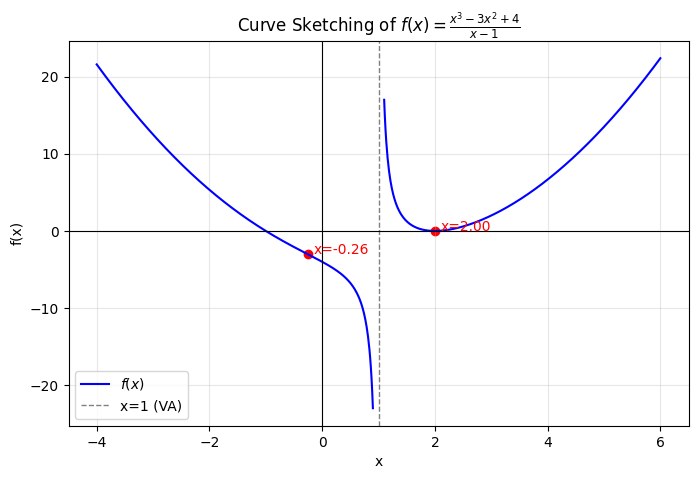

In [13]:
# ============================================================
# 📘 Chapter 10 — Curve Sketching
# ============================================================
# A complete symbolic and graphical analysis of a function:
# domain, intercepts, asymptotes, extrema, concavity, and inflection points.

from sympy import symbols, diff, solve, limit, oo, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and function
x = symbols('x', real=True)
f = (x**3 - 3*x**2 + 4) / (x - 1)

# --- 1️⃣ Domain ---
display(Math(r"f(x) = \frac{x^3 - 3x^2 + 4}{x - 1}"))
display(Math(r"\text{Domain: } \mathbb{R}\setminus\{1\}"))

# --- 2️⃣ Intercepts ---
x_intercepts = solve(f, x)
y_intercept = f.subs(x, 0)
display(Math(r"x\text{-intercepts: } x=" + latex(x_intercepts)))
display(Math(r"y\text{-intercept: } (0," + latex(y_intercept) + r")"))

# --- 3️⃣ Vertical and oblique asymptotes ---
v_asymptote = 1
oblique = f.as_leading_term(x)   # large x behavior
limit_inf = limit(f, x, oo)
display(Math(r"\text{Vertical asymptote: } x=1"))
display(Math(r"\lim_{x\to\infty} f(x) = " + latex(limit_inf)))

# --- 4️⃣ First derivative (monotonicity, extrema) ---
fprime = diff(f, x)
critical_points = solve(fprime, x)
display(Math(r"f'(x) = " + latex(fprime)))
display(Math(r"\text{Critical points: } x = " + latex(critical_points)))

# --- 5️⃣ Second derivative (concavity, inflection) ---
fdouble = diff(fprime, x)
inflections = solve(fdouble, x)
display(Math(r"f''(x) = " + latex(fdouble)))
display(Math(r"\text{Potential inflection points: } x = " + latex(inflections)))

# --- 6️⃣ Evaluate function at key points ---
key_points = [float(c) for c in critical_points + inflections if c.is_real]
f_values = [float(f.subs(x, p)) for p in key_points]

# --- 7️⃣ Plot function with asymptotes, extrema, and inflections ---
X1 = np.linspace(-4, 0.9, 400)
X2 = np.linspace(1.1, 6, 400)
Y1 = [(xv**3 - 3*xv**2 + 4)/(xv - 1) for xv in X1]
Y2 = [(xv**3 - 3*xv**2 + 4)/(xv - 1) for xv in X2]

plt.figure(figsize=(8,5))
plt.plot(X1, Y1, color='blue')
plt.plot(X2, Y2, color='blue', label=r"$f(x)$")

# Vertical asymptote
plt.axvline(v_asymptote, color='gray', ls='--', lw=1, label="x=1 (VA)")

# Mark extrema and inflection points
for xp, yp in zip(key_points, f_values):
    plt.scatter(xp, yp, color='red')
    plt.text(xp+0.1, yp, f"x={xp:.2f}", color='red')

plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.grid(True, alpha=0.3)
plt.title("Curve Sketching of $f(x)=\\frac{x^3-3x^2+4}{x-1}$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

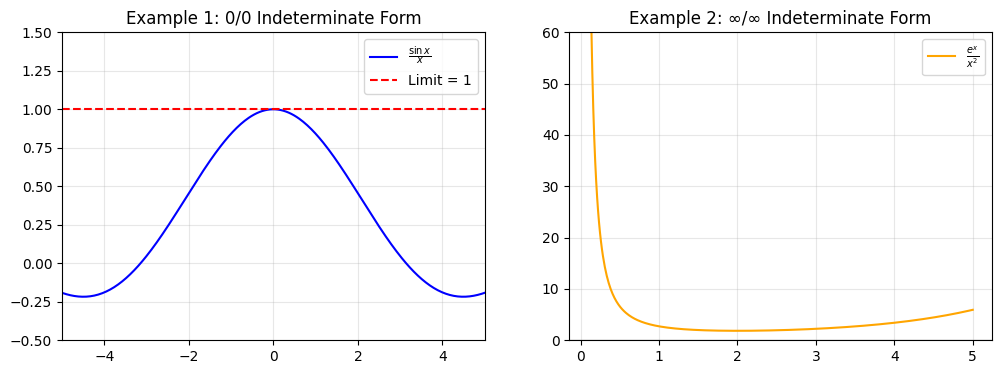

In [15]:
# ============================================================
# 📘 Chapter 11 — L’Hôpital’s Rule
# ============================================================
# Symbolic and graphical demonstration of L'Hôpital's Rule
# for indeterminate forms (0/0 and ∞/∞).

from sympy import symbols, sin, cos, exp, limit, diff, oo, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variable
x = symbols('x', real=True)

# --- Example 1: 0/0 form ---
f1 = sin(x)
g1 = x
display(Math(r"\lim_{x\to0}\frac{\sin x}{x} = " + latex(limit(f1/g1, x, 0))))
display(Math(r"\text{Apply L'Hôpital's Rule: } \lim_{x\to0}\frac{\cos x}{1} = 1"))

# --- Example 2: ∞/∞ form ---
f2 = exp(x)
g2 = x**2
display(Math(r"\lim_{x\to\infty}\frac{e^x}{x^2} = " + latex(limit(f2/g2, x, oo))))
display(Math(r"\text{Apply L'Hôpital twice: } \frac{e^x}{2x} \to \frac{e^x}{2} = \infty"))

# --- Example 3: 0/0 with trig and polynomial ---
f3 = 1 - cos(2*x)
g3 = x**2
lim3 = limit(f3/g3, x, 0)
display(Math(r"\lim_{x\to0}\frac{1-\cos(2x)}{x^2} = " + latex(lim3)))
display(Math(r"\text{Apply L'Hôpital twice: } \lim_{x\to0}\frac{2\sin(2x)}{2x} = 2"))

# --- Graphical demonstration ---
X = np.linspace(-2*np.pi, 2*np.pi, 400)

# Plot 1: sin(x)/x near 0
Y1 = np.sin(X) / X
Y1[np.isnan(Y1)] = 1  # handle x=0

# Plot 2: e^x/x^2 as x→∞
X2 = np.linspace(0.1, 5, 400)
Y2 = np.exp(X2) / X2**2

fig, axs = plt.subplots(1, 2, figsize=(12,4))

# Left plot
axs[0].plot(X, Y1, color='blue', label=r"$\frac{\sin x}{x}$")
axs[0].axhline(1, color='red', ls='--', label="Limit = 1")
axs[0].set_xlim(-5, 5)
axs[0].set_ylim(-0.5, 1.5)
axs[0].set_title("Example 1: 0/0 Indeterminate Form")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# Right plot
axs[1].plot(X2, Y2, color='orange', label=r"$\frac{e^x}{x^2}$")
axs[1].axhline(0, color='black', lw=0.8)
axs[1].set_ylim(0, 60)
axs[1].set_title("Example 2: ∞/∞ Indeterminate Form")
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

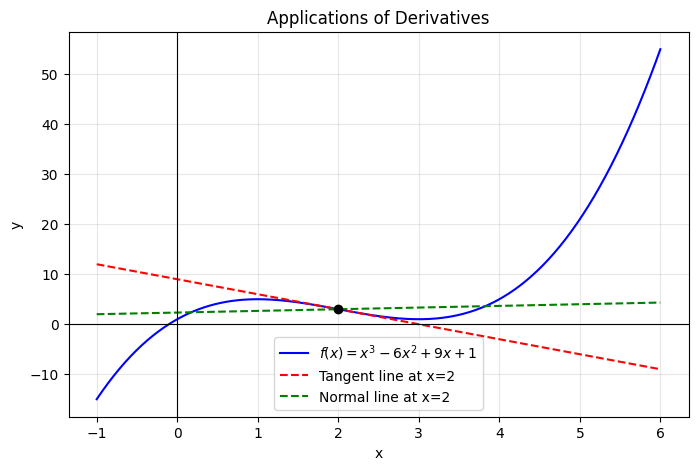

In [16]:
# ============================================================
# 📘 Chapter 12 — Applications of Derivatives
# ============================================================
# Study of monotonicity, optimization, and tangent/normal lines.

from sympy import symbols, diff, solve, Eq, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable and function
x = symbols('x', real=True)
f = x**3 - 6*x**2 + 9*x + 1

# --- 1️⃣ Monotonicity Analysis ---
fprime = diff(f, x)
critical_points = solve(Eq(fprime, 0), x)
display(Math(r"f(x) = " + latex(f)))
display(Math(r"f'(x) = " + latex(fprime)))
display(Math(r"\text{Critical points: } x = " + latex(critical_points)))

# Determine increasing/decreasing intervals
display(Math(r"\text{f increases where } f'(x)>0, \text{ decreases where } f'(x)<0."))

# --- 2️⃣ Optimization Example ---
# Maximize area of a rectangle inscribed under y = 4 - x^2 (x ≥ 0)
x_opt = symbols('x_opt', real=True, positive=True)
A = x_opt * (4 - x_opt**2)  # area
A_prime = diff(A, x_opt)
x_max = solve(Eq(A_prime, 0), x_opt)[0]
A_max = A.subs(x_opt, x_max)
display(Math(r"A(x)=x(4-x^2), \; A'(x)=4-3x^2, \; A'(x)=0 \Rightarrow x=" + latex(x_max)))
display(Math(r"A_{max}=" + latex(A_max)))

# --- 3️⃣ Tangent and Normal Lines ---
x0 = 2
fprime_val = float(fprime.subs(x, x0))
f_val = float(f.subs(x, x0))
display(Math(r"Tangent\ slope\ at\ x_0=2:\ f'(2)=" + latex(fprime.subs(x, 2))))

# Tangent: y - f(x0) = f'(x0)(x - x0)
# Normal:  y - f(x0) = -1/f'(x0)(x - x0)
X = np.linspace(-1, 6, 400)
Y = X**3 - 6*X**2 + 9*X + 1
tangent = f_val + fprime_val*(X - x0)
normal = f_val - (1/fprime_val)*(X - x0)

# --- 4️⃣ Plot ---
plt.figure(figsize=(8,5))
plt.plot(X, Y, label=r"$f(x)=x^3-6x^2+9x+1$", color='blue')
plt.plot(X, tangent, 'r--', label="Tangent line at x=2")
plt.plot(X, normal, 'g--', label="Normal line at x=2")
plt.scatter([x0], [f_val], color='black', zorder=5)
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Applications of Derivatives")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

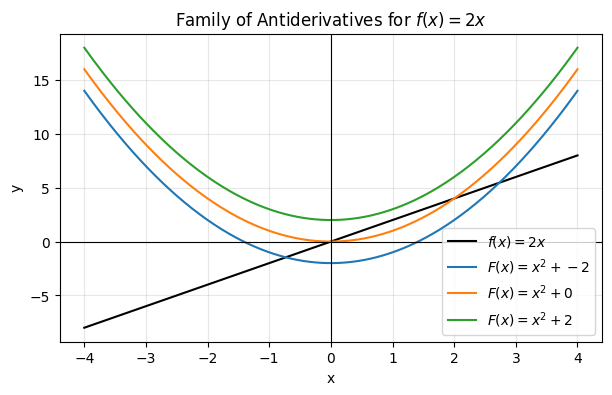

In [17]:
# ============================================================
# 📘 Chapter 13 — Antiderivatives and Indefinite Integrals
# ============================================================
# Symbolic computation of indefinite integrals (antiderivatives),
# verification by differentiation, and graphical interpretation.

from sympy import symbols, sin, cos, exp, integrate, diff, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable
x = symbols('x', real=True)

# --- 1️⃣ Symbolic Antiderivatives ---
f1 = 3*x**2 - 4*x + 1
F1 = integrate(f1, x)
display(Math(r"\int (3x^2 - 4x + 1)\,dx = " + latex(F1) + r" + C"))

# Check derivative of F1 equals f1
check = diff(F1, x)
display(Math(r"\frac{d}{dx}\left(" + latex(F1) + r"\right) = " + latex(check)))

# --- 2️⃣ Trigonometric and Exponential Examples ---
f2 = exp(x) * cos(x)
F2 = integrate(f2, x)
display(Math(r"\int e^x \cos x\,dx = " + latex(F2) + r" + C"))
display(Math(r"\text{Verify: } \frac{d}{dx}(" + latex(F2) + r") = " + latex(diff(F2, x))))

# --- 3️⃣ Family of Antiderivatives (Graphical Interpretation) ---
f3 = 2*x
F3 = integrate(f3, x)  # x^2
C_values = [-2, 0, 2]

X = np.linspace(-4, 4, 400)
Y = 2*X  # f3(x)
plt.figure(figsize=(7,4))
plt.plot(X, Y, 'k', label=r"$f(x)=2x$")

# Plot family of antiderivatives y=x^2+C
for C in C_values:
    plt.plot(X, X**2 + C, label=fr"$F(x)=x^2+{C}$")

plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Family of Antiderivatives for $f(x)=2x$")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

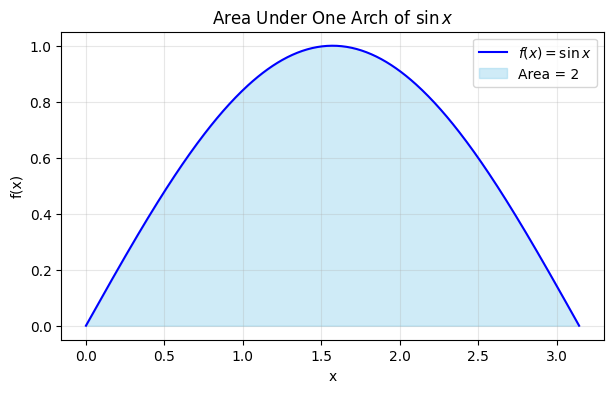

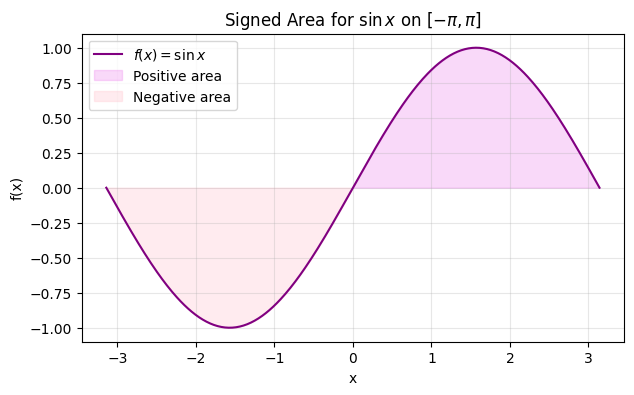

In [19]:
# ============================================================
# 📘 Chapter 14 — The Definite Integral
# ============================================================
# Symbolic computation of definite integrals and their geometric meaning.
# Visualize area under a curve and verify the Fundamental Theorem of Calculus.

from sympy import symbols, sin, exp, integrate, diff, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable
x = symbols('x', real=True)

# --- 1️⃣ Symbolic Definite Integrals ---
f1 = 3*x**2 - 4*x + 1
A1 = integrate(f1, (x, 0, 3))
display(Math(r"\int_0^3 (3x^2 - 4x + 1)\,dx = " + latex(A1)))

f2 = sin(x)
A2 = integrate(f2, (x, 0, np.pi))
display(Math(r"\int_0^{\pi} \sin x\,dx = " + latex(A2)))

# --- 2️⃣ Verify Fundamental Theorem of Calculus ---
F1 = integrate(f1, x)
FTC_check = diff(F1, x)
display(Math(r"F(x) = " + latex(F1) + r" \Rightarrow F'(x) = " + latex(FTC_check)))
display(Math(r"\text{Thus } \int_a^b f(x)\,dx = F(b) - F(a)"))

# --- 3️⃣ Geometric Visualization (Area Under Curve) ---
X = np.linspace(0, np.pi, 400)
Y = np.sin(X)

plt.figure(figsize=(7,4))
plt.plot(X, Y, label=r"$f(x)=\sin x$", color='blue')
plt.fill_between(X, Y, color='skyblue', alpha=0.4, label="Area = 2")
plt.title(r"Area Under One Arch of $\sin x$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 4️⃣ Signed Area Example ---
X2 = np.linspace(-np.pi, np.pi, 400)
Y2 = np.sin(X2)

plt.figure(figsize=(7,4))
plt.plot(X2, Y2, color='purple', label=r"$f(x)=\sin x$")
plt.fill_between(X2, Y2, where=(Y2>=0), color='violet', alpha=0.3, label="Positive area")
plt.fill_between(X2, Y2, where=(Y2<0), color='pink', alpha=0.3, label="Negative area")
plt.title(r"Signed Area for $\sin x$ on $[-\pi, \pi]$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

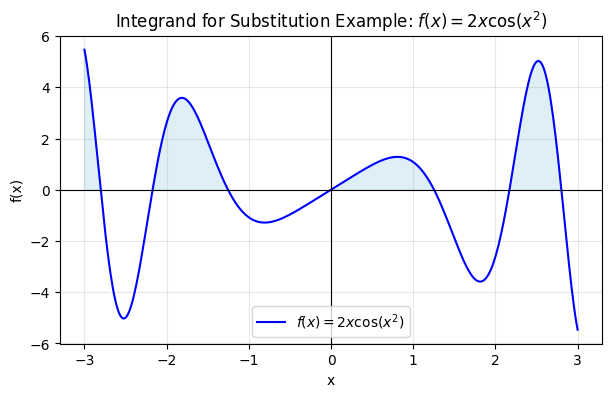

<IPython.core.display.Math object>

In [20]:
# ============================================================
# 📘 Chapter 15 — Techniques of Integration
# ============================================================
# Explore integration techniques: substitution, parts, and partial fractions.
# Symbolic computations and visual interpretation.

from sympy import symbols, sin, cos, exp, integrate, diff, log, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define variable
x, u = symbols('x u', real=True)

# --- 1️⃣ Substitution Example ---
# ∫ 2x cos(x^2) dx → let u = x² → du = 2x dx
f1 = 2*x*cos(x**2)
F1 = integrate(f1, x)
display(Math(r"\int 2x\cos(x^2)\,dx = " + latex(F1) + r" + C"))
display(Math(r"\text{(using }u=x^2,\ du=2x\,dx\text{)}"))

# --- 2️⃣ Integration by Parts ---
# ∫ x e^x dx = x e^x - ∫ e^x dx = e^x(x - 1) + C
f2 = x*exp(x)
F2 = integrate(f2, x)
display(Math(r"\int x e^x\,dx = " + latex(F2) + r" + C"))
display(Math(r"\text{(Integration by parts: }u=x,\ dv=e^x\,dx\text{)}"))

# --- 3️⃣ Partial Fraction Decomposition ---
# ∫ (2x+3)/(x^2 + 3x + 2) dx
f3 = (2*x + 3)/(x**2 + 3*x + 2)
F3 = integrate(f3, x)
display(Math(r"\int \frac{2x+3}{x^2+3x+2}\,dx = " + latex(F3) + r" + C"))
display(Math(r"\text{(Decomposed as } \frac{A}{x+1} + \frac{B}{x+2}\text{)}"))

# --- 4️⃣ Graphical illustration for substitution example ---
X = np.linspace(-3, 3, 400)
Y = 2*X*np.cos(X**2)

plt.figure(figsize=(7,4))
plt.plot(X, Y, label=r"$f(x)=2x\cos(x^2)$", color='blue')
plt.fill_between(X, Y, where=(Y>0), color='lightblue', alpha=0.4)
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title(r"Integrand for Substitution Example: $f(x)=2x\cos(x^2)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# --- 5️⃣ Verification of partial fraction result ---
display(Math(r"\text{Verification: } \frac{d}{dx}\left(" + latex(F3) + r"\right) = " + latex(diff(F3, x))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

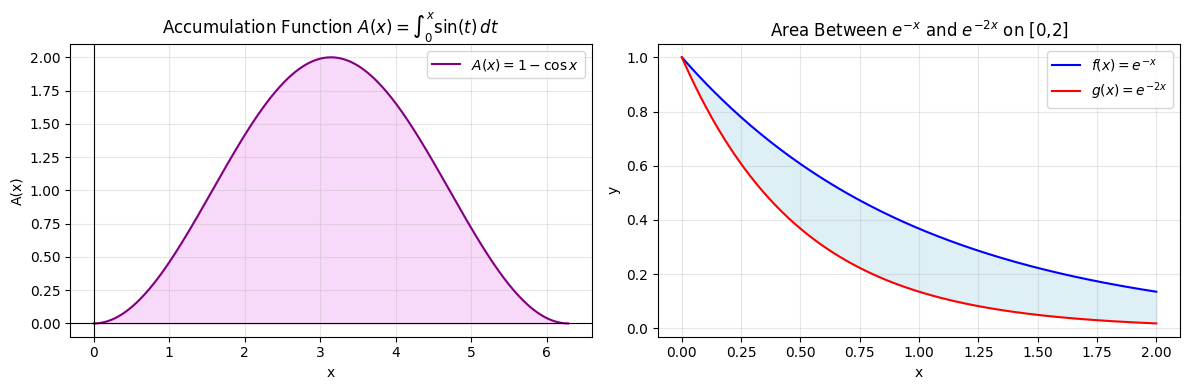

In [21]:
# ============================================================
# 📘 Chapter 16 — The Definite Integral as Area and Accumulation
# ============================================================
# Illustrate the accumulation function and area between curves
# using symbolic integration and Matplotlib.

from sympy import symbols, sin, exp, integrate, diff, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variable
x, t = symbols('x t', real=True)

# --- 1️⃣ Accumulation Function ---
# f(t) = sin(t), A(x) = ∫_0^x sin(t) dt = 1 - cos(x)
f = sin(t)
A = integrate(f, (t, 0, x))
display(Math(r"A(x) = \int_0^x \sin(t)\,dt = " + latex(A)))
display(Math(r"A'(x) = \sin(x) \text{ (Fundamental Theorem of Calculus)}"))

# --- 2️⃣ Symbolic Evaluation at Specific Points ---
A_vals = {a: A.subs(x, a) for a in [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]}
display(Math(r"A(0)=0,\quad A(\pi/2)=1,\quad A(\pi)=2,\quad A(3\pi/2)=1,\quad A(2\pi)=0"))

# --- 3️⃣ Area Between Two Curves ---
# f(x) = e^{-x}, g(x) = e^{-2x}, x ∈ [0,2]
f1 = exp(-x)
f2 = exp(-2*x)
Area_between = integrate(f1 - f2, (x, 0, 2))
display(Math(r"\text{Area between } f(x)=e^{-x} \text{ and } g(x)=e^{-2x} \text{ on } [0,2]:"))
display(Math(r"\int_0^2 (e^{-x}-e^{-2x})\,dx = " + latex(Area_between)))

# --- 4️⃣ Plot Accumulation Function and Area Between Curves ---
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# (a) Accumulation function A(x)
X = np.linspace(0, 2*np.pi, 400)
A_num = 1 - np.cos(X)
axs[0].plot(X, A_num, label=r"$A(x)=1-\cos x$", color='purple')
axs[0].fill_between(X, 0, A_num, color='violet', alpha=0.3)
axs[0].axhline(0, color='black', lw=0.8)
axs[0].axvline(0, color='black', lw=0.8)
axs[0].set_title(r"Accumulation Function $A(x)=\int_0^x \sin(t)\,dt$")
axs[0].set_xlabel("x")
axs[0].set_ylabel("A(x)")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# (b) Area between f(x)=e^{-x} and g(x)=e^{-2x}
X2 = np.linspace(0, 2, 300)
Y1 = np.exp(-X2)
Y2 = np.exp(-2*X2)
axs[1].plot(X2, Y1, color='blue', label=r"$f(x)=e^{-x}$")
axs[1].plot(X2, Y2, color='red', label=r"$g(x)=e^{-2x}$")
axs[1].fill_between(X2, Y1, Y2, where=(Y1>Y2), color='lightblue', alpha=0.4)
axs[1].set_title(r"Area Between $e^{-x}$ and $e^{-2x}$ on [0,2]")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

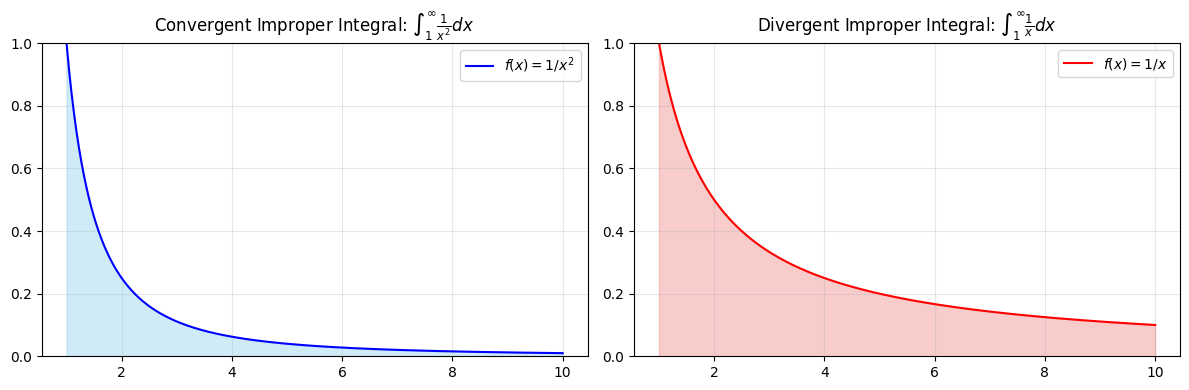

In [22]:
# ============================================================
# 📘 Chapter 18 — Improper Integrals
# ============================================================
# Symbolic and graphical exploration of improper integrals:
# (1) Infinite limits, (2) Infinite discontinuities.

from sympy import symbols, integrate, oo, sin, exp, diff, limit, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt

# Define symbolic variable
x = symbols('x', positive=True)

# --- 1️⃣ Improper Integral with Infinite Limit ---
# ∫₁^∞ 1/x² dx convergent (p > 1)
f1 = 1/x**2
I1 = integrate(f1, (x, 1, oo))
display(Math(r"\int_1^{\infty} \frac{1}{x^2}\,dx = " + latex(I1)))
display(Math(r"\text{Since } p=2>1, \text{ the integral converges.}"))

# --- 2️⃣ Improper Integral with Infinite Discontinuity ---
# ∫₀¹ 1/√x dx convergent (p < 1 at 0)
f2 = 1/x**0.5
I2 = integrate(f2, (x, 0, 1))
display(Math(r"\int_0^{1} \frac{1}{\sqrt{x}}\,dx = " + latex(I2)))
display(Math(r"\text{The improper integral converges because } p<1."))

# --- 3️⃣ Divergent Improper Integral Example ---
# ∫₁^∞ 1/x dx diverges (harmonic integral)
f3 = 1/x
I3 = integrate(f3, (x, 1, oo))
display(Math(r"\int_1^{\infty} \frac{1}{x}\,dx \text{ diverges (logarithmic).}"))

# --- 4️⃣ Oscillatory Improper Integral ---
# ∫₀^∞ e^{-x} sin(x) dx convergent by exponential decay
f4 = exp(-x)*sin(x)
I4 = integrate(f4, (x, 0, oo))
display(Math(r"\int_0^{\infty} e^{-x}\sin x\,dx = " + latex(I4)))
display(Math(r"\text{Convergent by exponential damping.}"))

# --- 5️⃣ Visualization of Convergent vs Divergent Behavior ---
fig, axs = plt.subplots(1, 2, figsize=(12,4))

# (a) Convergent 1/x² on [1,∞)
X1 = np.linspace(1, 10, 400)
Y1 = 1/X1**2
axs[0].plot(X1, Y1, color='blue', label=r"$f(x)=1/x^2$")
axs[0].fill_between(X1, Y1, color='skyblue', alpha=0.4)
axs[0].set_ylim(0, 1)
axs[0].set_title(r"Convergent Improper Integral: $\int_1^\infty \frac{1}{x^2}dx$")
axs[0].grid(True, alpha=0.3)
axs[0].legend()

# (b) Divergent 1/x on [1,∞)
X2 = np.linspace(1, 10, 400)
Y2 = 1/X2
axs[1].plot(X2, Y2, color='red', label=r"$f(x)=1/x$")
axs[1].fill_between(X2, Y2, color='lightcoral', alpha=0.4)
axs[1].set_ylim(0, 1)
axs[1].set_title(r"Divergent Improper Integral: $\int_1^\infty \frac{1}{x}dx$")
axs[1].grid(True, alpha=0.3)
axs[1].legend()

plt.tight_layout()
plt.show()


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

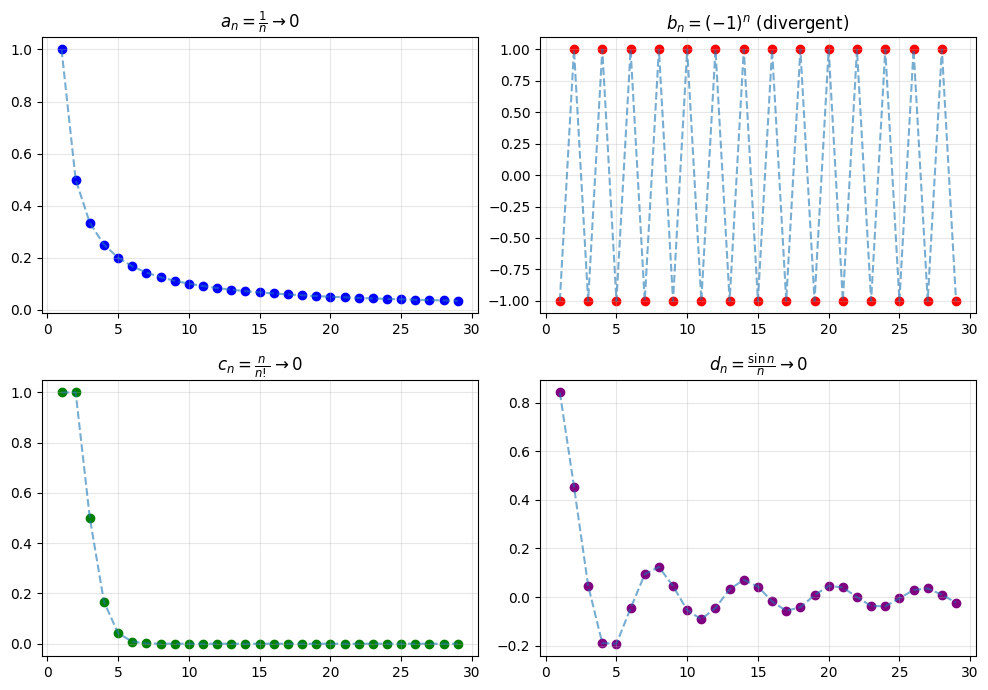

In [24]:
# ============================================================
# 📘 Chapter 19 — Sequences of Numbers
# ============================================================
# Explore sequences: definition, convergence, divergence,
# symbolic limits, and graphical visualization.

from sympy import symbols, limit, sin, factorial, latex
from IPython.display import display, Math
import numpy as np
import matplotlib.pyplot as plt
import math  # ✅ Fix: import math for factorial()

# Define symbolic variable (discrete n)
n = symbols('n', positive=True, integer=True)

# --- 1️⃣ Definition of a Sequence ---
# aₙ = 1/n
a_n = 1/n
display(Math(r"a_n = \frac{1}{n}"))
display(Math(r"\lim_{n\to\infty} a_n = " + latex(limit(a_n, n, np.inf))))

# --- 2️⃣ Divergent Sequence ---
# bₙ = (-1)^n oscillates between -1 and 1
b_n = (-1)**n
display(Math(r"b_n = (-1)^n"))
display(Math(r"\text{Sequence oscillates: does not converge.}"))

# --- 3️⃣ Convergent Sequence with Factorial Growth ---
# cₙ = n / n! → 0 as n→∞
c_n = n / factorial(n)
display(Math(r"c_n = \frac{n}{n!}"))
display(Math(r"\lim_{n\to\infty} c_n = " + latex(limit(c_n, n, np.inf))))

# --- 4️⃣ Oscillating Damped Sequence ---
# dₙ = sin(n)/n → 0
d_n = sin(n)/n
display(Math(r"d_n = \frac{\sin n}{n}"))
display(Math(r"\lim_{n\to\infty} d_n = " + latex(limit(d_n, n, np.inf))))

# --- 5️⃣ Numerical Visualization ---
N = np.arange(1, 30)
a_vals = 1/N
b_vals = (-1)**N
c_vals = N / np.array([math.factorial(int(i)) for i in N])  # ✅ fixed line
d_vals = np.sin(N)/N

fig, axs = plt.subplots(2, 2, figsize=(10,7))

# aₙ = 1/n
axs[0,0].scatter(N, a_vals, color='blue')
axs[0,0].plot(N, a_vals, '--', alpha=0.6)
axs[0,0].set_title(r"$a_n=\frac{1}{n}\to0$")
axs[0,0].grid(True, alpha=0.3)

# bₙ = (-1)^n
axs[0,1].scatter(N, b_vals, color='red')
axs[0,1].plot(N, b_vals, '--', alpha=0.6)
axs[0,1].set_title(r"$b_n=(-1)^n$ (divergent)")
axs[0,1].grid(True, alpha=0.3)

# cₙ = n/n!
axs[1,0].scatter(N, c_vals, color='green')
axs[1,0].plot(N, c_vals, '--', alpha=0.6)
axs[1,0].set_title(r"$c_n=\frac{n}{n!}\to0$")
axs[1,0].grid(True, alpha=0.3)

# dₙ = sin(n)/n
axs[1,1].scatter(N, d_vals, color='purple')
axs[1,1].plot(N, d_vals, '--', alpha=0.6)
axs[1,1].set_title(r"$d_n=\frac{\sin n}{n}\to0$")
axs[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()
